In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklift.metrics import qini_curve, perfect_qini_curve, qini_auc_score, uplift_at_k
sns.set()

In [3]:
data=pd.read_csv('../data/raw/dataset.csv')

In [4]:
data.shape

(600000, 53)

In [5]:
data.drop('id', axis=1).describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,conversion
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,-3.758503,0.000405,0.356208,-1.004378,3.376919,-6.396371,-2.253712,-6.432606,-0.061507,-1.659301,19.093492,-0.093886,-0.002533,-2.463280,13.161988,7.063375,6.858253,-0.020896,-0.985809,-1.114770,14.835209,-9.909231,0.002470,-0.002707,11.159296,0.024798,-0.978981,4.599121,-6.263516,0.000554,2.704003,0.027546,-6.514740,-0.005655,3.002134,5.325791,7.739900,-4.721989,-9.206852,2.728692,6.882868,-6.632834,8.454493,0.001296,0.007967,-0.000966,-22.259600,-5.759041,6.241130,-1.176456,0.204190
std,54.881882,0.999419,31.804123,45.291429,53.397644,140.873734,59.810396,74.840857,44.912292,199.625148,455.894665,11.295157,56.797326,39.922589,114.277207,77.628539,190.951808,11.476030,26.239683,72.371005,138.517373,160.879307,0.999777,1.000431,104.195126,28.332643,13.729246,142.981246,75.071084,1.000134,51.108902,107.851987,153.130771,6.964937,47.529482,70.700510,134.675174,131.789351,197.493595,39.501936,163.776538,137.025868,262.840194,1.000368,71.553713,0.999902,500.900364,130.952113,141.211999,21.363662,0.403109
min,-271.659497,-4.372119,-148.870768,-244.446728,-302.574049,-683.126343,-322.731683,-506.202937,-218.466369,-920.347783,-2289.294108,-52.074964,-313.255431,-195.457350,-636.553079,-533.404670,-913.011610,-55.140610,-125.733156,-330.755792,-770.324798,-774.266979,-4.545333,-4.708793,-579.451426,-126.515623,-64.651485,-732.116727,-399.414460,-4.553086,-346.728398,-515.521884,-743.800243,-32.088261,-251.277376,-348.076864,-668.793144,-700.110808,-1016.301591,-179.589370,-810.842593,-633.575178,-1345.838757,-4.756720,-360.713742,-4.516004,-2506.960013,-687.526201,-702.184241,-98.094323,0.000000
25%,-40.693313,-0.673108,-20.758308,-30.644608,-31.865404,-100.762161,-42.313674,-54.840796,-30.327330,-134.565241,-286.292508,-7.613948,-38.401625,-29.205585,-62.727814,-36.893267,-121.868113,-7.752689,-18.645383,-50.050451,-77.058591,-117.394644,-0.671963,-0.676781,-57.964784,-19.118055,-10.247693,-91.190920,-56.366783,-0.674265,-30.975631,-72.732677,-109.888686,-4.711524,-26.971012,-42.250017,-82.922581,-93.661192,-142.413854,-23.338528,-102.658380,-99.033996,-167.634846,-0.673780,-48.250836,-0.675549,-357.547278,-93.163915,-88.803657,-15.580688,0.000000
50%,-3.954771,0.000915,0.372583,-0.585368,3.720738,-6.357443,-2.263690,-6.416419,-0.103742,-1.628897,17.651122,-0.092166,-0.011893,-2.438805,13.426780,6.988854,6.639970,-0.030727,-1.007271,-1.084433,15.207025,-9.837197,0.001802,-0.003722,11.438983,0.023834,-0.946478,4.772537,-6.364402,-0.000372,2.732262,0.114877,-6.661874,-0.000436,2.966662,5.500324,7.516796,-4.835168,-9.003721,2.779691,7.190600,-6.784760,8.773280,0.001639,0.045537,-0.002251,-20.695017,-5.774627,6.286783,-1.199895,0.000000
75%,33.174835,0.673056,21.495530,29.027860,38.988940,88.159514,37.709780,41.962767,30.144501,130.948487,324.226048,7.409305,38.291691,24.248160,89.130548,50.993029,135.756702,7.731675,16.690977,47.694238,106.788310,97.891879,0.677217,0.671145,80.327985,19.116412,8.309784,100.845315,43.792144,0.675415,36.369149,72.890914,96.255945,4.690724,32.898

In [7]:
data['id'].nunique() == data.shape[0]

True

In [56]:
data['conversion'].unique()

array([0, 1])

In [57]:
data['conversion'].mean()

np.float64(0.20419)

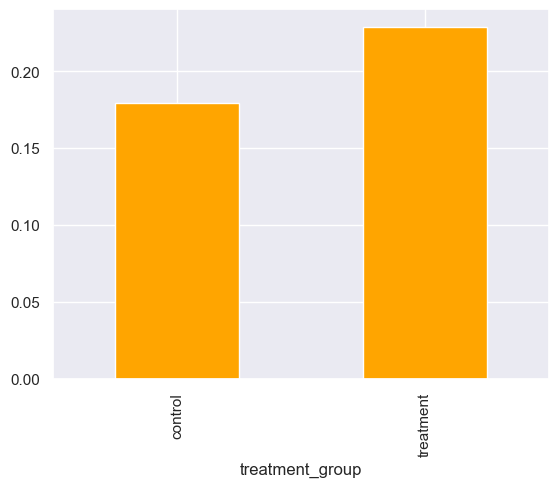

In [10]:
data.groupby('treatment_group')['conversion'].mean().plot(kind='bar', color='orange');

In [11]:
features=data.drop(['conversion', 'treatment_group'], axis=1).columns 
tname='conversion'
gname='treatment_group'

In [14]:
def estimate_feature_importance(feat, target):
    return roc_auc_score(target, feat) 

def estimate_features_importance(data, features:str, target: str):
    importances=[]
    for feat in features:
        importances.append((
            feat,
            estimate_feature_importance(data[feat], data[target])
            )
        )   
    return pd.DataFrame(importances, columns=['feature', 'importance'])

def estimate_features_importance_by_group(data, features:str, target: str, group: str):
    importances=[]

    groups=data[group].unique()
    dfs=[data[data[group]==g] for g in groups]

    for i, df in enumerate(dfs): 
        importances.append({
            'group': groups[i],
            'res': estimate_features_importance(df, features, target)
        })
    return importances

In [15]:
estimate_features_importance(data, features, tname)

,feature,importance
0,id,0.500132
1,X_1,0.500137
2,X_2,0.499560
3,X_3,0.501810
4,X_4,0.494117
5,X_5,0.495160
6,X_6,0.499325
7,X_7,0.502784
8,X_8,0.499686
9,X_9,0.501779


In [17]:
res=estimate_features_importance_by_group(data, features, tname, gname)

In [19]:
print(res[0]['group'])
res[0]['res']

control


,feature,importance
0,id,0.500128
1,X_1,0.500146
2,X_2,0.500982
3,X_3,0.504615
4,X_4,0.502137
5,X_5,0.502315
6,X_6,0.499786
7,X_7,0.505259
8,X_8,0.500832
9,X_9,0.500818


In [20]:
print(res[1]['group'])
res[1]['res']

treatment


,feature,importance
0,id,0.500156
1,X_1,0.500227
2,X_2,0.498365
3,X_3,0.499458
4,X_4,0.487316
5,X_5,0.489022
6,X_6,0.499010
7,X_7,0.500747
8,X_8,0.498673
9,X_9,0.502734


In [ ]:
def count_outliers(data, features:str):
    numbers=[]
    
    for feat in features:
        q1=data[feat].quantile(0.05)
        q3=data[feat].quantile(0.95)
        iqr = q3 - q1 
        lower_bound = q1 - 1.5 * iqr 
        upper_bound = q3 + 1.5 * iqr  
        outliers = data[(data[feat] < lower_bound) | (data[feat] > upper_bound)]
        number=outliers.shape[0]
        numbers.append({'feature': feat, 'outlier_numbers': number})

    return pd.DataFrame(numbers)


In [40]:
data['treatment_group'].value_counts()

treatment_group
treatment    300368
control      299632
Name: count, dtype: int64

In [58]:
data = data.drop('id', axis=1)

In [75]:

treatment=data[data['treatment_group']=='treatment'] 
control=data[data['treatment_group']=='control']

treatment=treatment.drop('treatment_group', axis=1)
treatment['is_treatment'] = 1

control=control.drop('treatment_group', axis=1)
control['is_treatment'] = 0

treatment, treatment_test = train_test_split(treatment, test_size=0.2, stratify=treatment['conversion'], random_state=42)
control, control_test = train_test_split(control, test_size=0.2, stratify=control['conversion'], random_state=42)

treatment_train, treatment_val = train_test_split(treatment, test_size=0.2, stratify=treatment['conversion'], random_state=42)
control_train, control_val = train_test_split(control, test_size=0.2, stratify=control['conversion'],random_state=42)


train, val, test = \
    pd.concat([treatment_train, control_train]),\
    pd.concat([treatment_val, control_val]),\
    pd.concat([treatment_test, control_test])


In [76]:
data.shape

(600000, 52)

In [77]:
train.shape, val.shape, test.shape

((383999, 52), (96000, 52), (120001, 52))

In [78]:
for df in [train, val, test]: 
    print(df['conversion'].mean())

0.204188031739666
0.20419791666666667
0.2041899650836243


In [79]:
for df in [train, val, test]: 
    print(df['is_treatment'].mean())

0.5006132828470907
0.5006145833333333
0.5006124948958759


In [81]:
data['treatment_group'].value_counts()

treatment_group
treatment    300368
control      299632
Name: count, dtype: int64

In [68]:
outlier_numbers=count_outliers(train, features[1:])

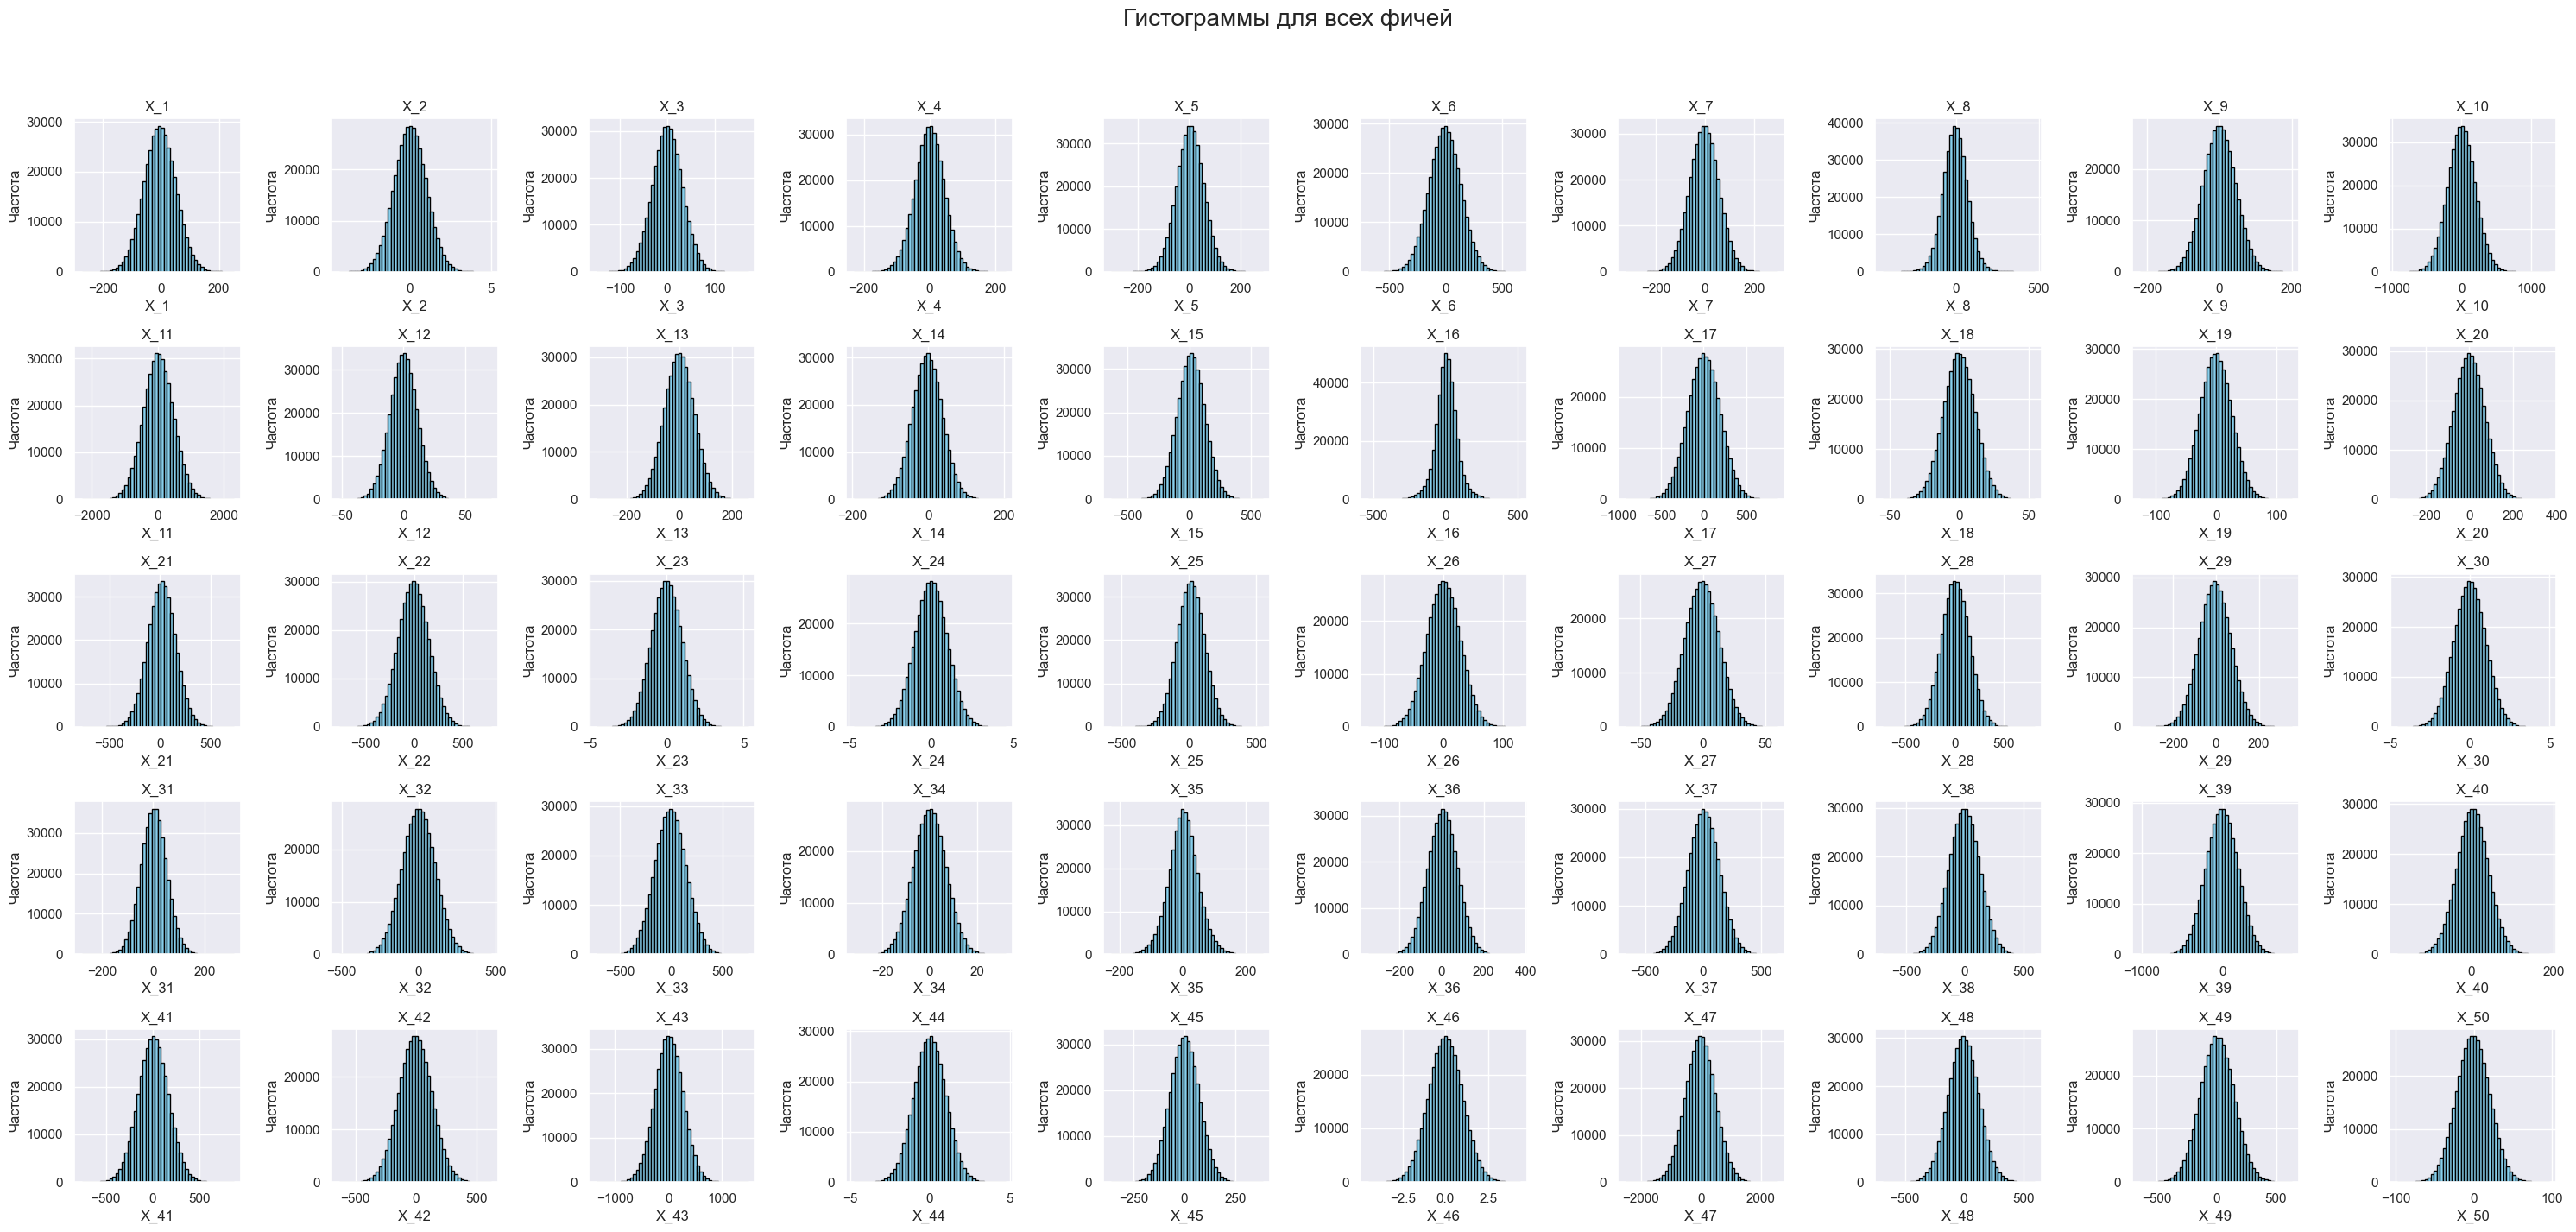

In [83]:
fig, axes = plt.subplots(5, 10, figsize=(30, 15))
axes = axes.flatten()

for i, feature in enumerate(features[1:]):
    axes[i].hist(train[feature], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Частота")

# Отключить лишние оси, если features < 50
for ax in axes[len(features):]:
    ax.axis('off')

fig.suptitle("Гистограммы для всех фичей", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [85]:
scalers=dict()

for fname in features[1:]: 
    scalers[fname] = StandardScaler()
    train[fname] = scalers[fname].fit_transform(train[fname].values.reshape(-1, 1))

for fname in features[1:]: 
    val[fname] = scalers[fname].fit_transform(val[fname].values.reshape(-1, 1))

for fname in features[1:]: 
    test[fname] = scalers[fname].fit_transform(test[fname].values.reshape(-1, 1))


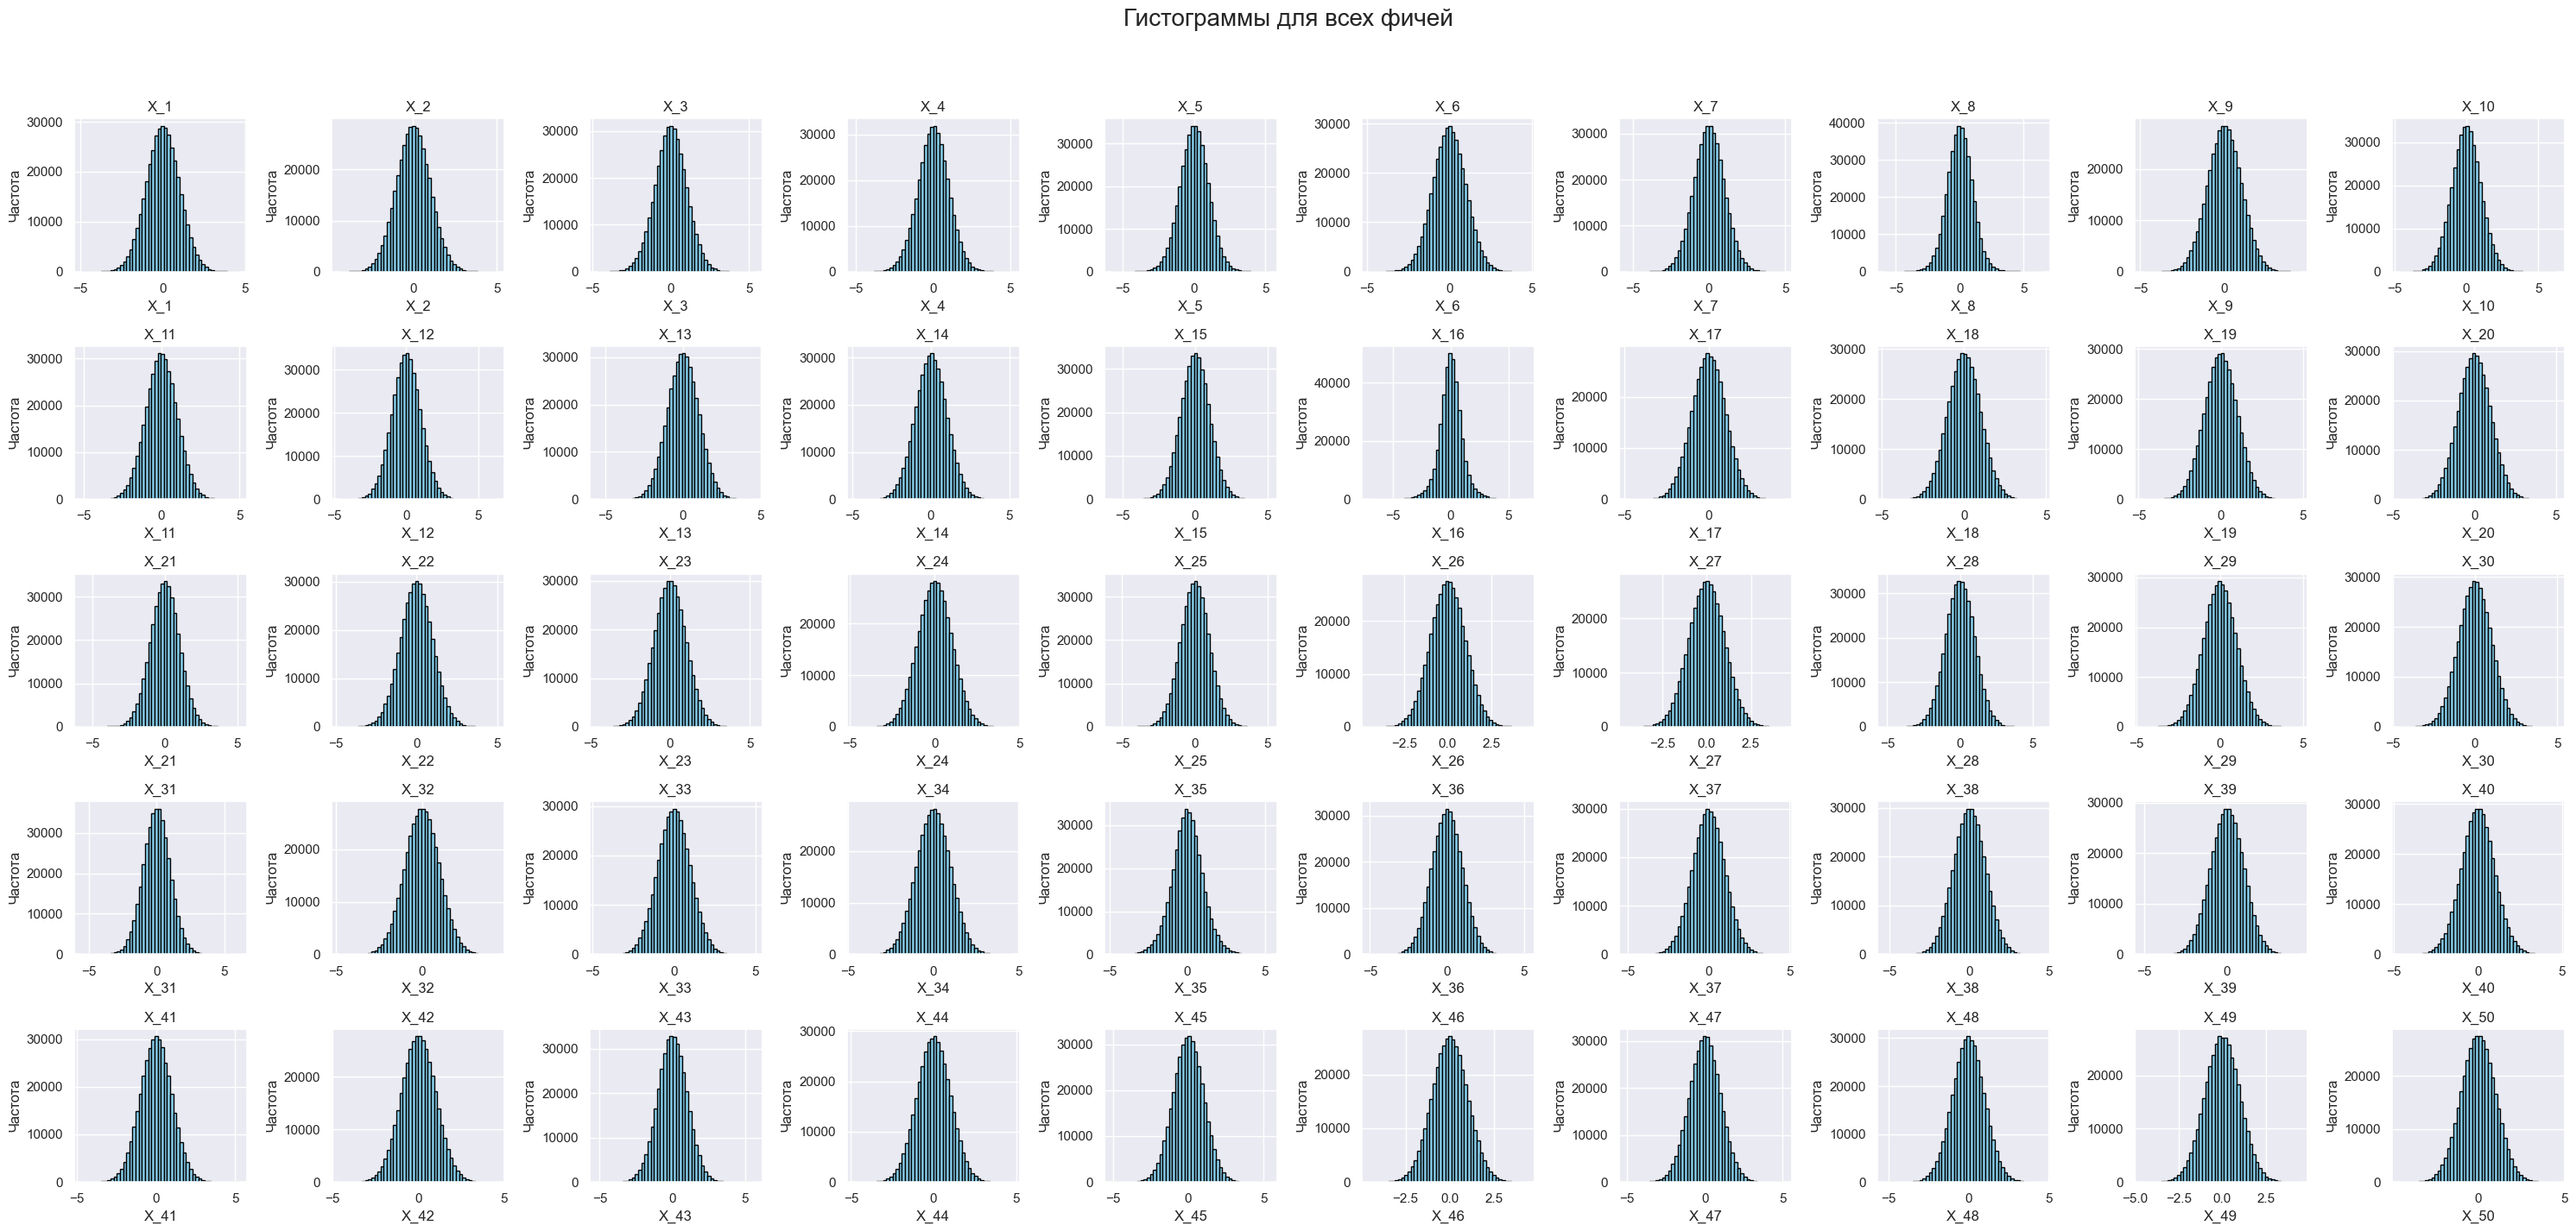

In [86]:
fig, axes = plt.subplots(5, 10, figsize=(30, 15))
axes = axes.flatten()

for i, feature in enumerate(features[1:]):
    axes[i].hist(train[feature], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Частота")

# Отключить лишние оси, если features < 50
for ax in axes[len(features):]:
    ax.axis('off')

fig.suptitle("Гистограммы для всех фичей", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Model 1: S-learner

In [71]:
import catboost as cb

In [87]:
tlearner = cb.CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=False,
    cat_features=['is_treatment']
)

tlearner.fit(
    train.drop('conversion', axis=1), 
    train['conversion']
    )


In [88]:
val_preds = tlearner.predict_proba(val.drop('conversion', axis=1))[:, 1]
train_preds = tlearner.predict_proba(train.drop('conversion', axis=1))[:, 1]
test_preds = tlearner.predict_proba(test.drop('conversion', axis=1))[:, 1]

In [89]:
print('roc-auc [train]:', roc_auc_score(train['conversion'], train_preds))
print('roc-auc [val]:', roc_auc_score(val['conversion'], val_preds))
print('roc-auc [test]:', roc_auc_score(test['conversion'], test_preds))

roc-auc [train]: 0.800358324433197
roc-auc [val]: 0.7826223663000746
roc-auc [test]: 0.7819551530474973


In [130]:
from sklift.metrics import qini_curve, perfect_qini_curve, qini_auc_score
import numpy as np 

In [125]:
def calculate_t_uplift(model, data):
    feats = data.drop(['conversion', 'is_treatment'], axis=1) 
    treat = feats.copy() 
    contr = feats.copy()
    treat['is_treatment'] = 1
    contr['is_treatment'] = 0 

    treat_preds = model.predict_proba(treat)[:, 1]
    contr_preds = model.predict_proba(contr)[:, 1]
    return treat_preds - contr_preds

In [126]:
train_uplift = calculate_t_uplift(tlearner, train)
test_uplift = calculate_t_uplift(tlearner, test)
val_uplift = calculate_t_uplift(tlearner, val)

/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


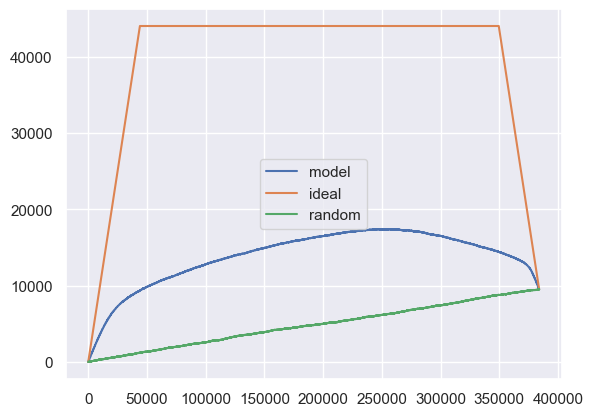

In [127]:
k_model_, score_model_ = qini_curve(train['conversion'].values, train_uplift, train['is_treatment'].values)
k_ideal, score_ideal = perfect_qini_curve(train['conversion'].values, train['is_treatment'].values)
k_random, score_random = qini_curve(train['conversion'].values, np.random.random(len(train['conversion'])), train['is_treatment'].values)

plt.plot(k_model_, score_model_, label='model');
plt.plot(k_ideal, score_ideal, label='ideal');
plt.plot(k_random, score_random, label='random');
plt.legend()
plt.show();




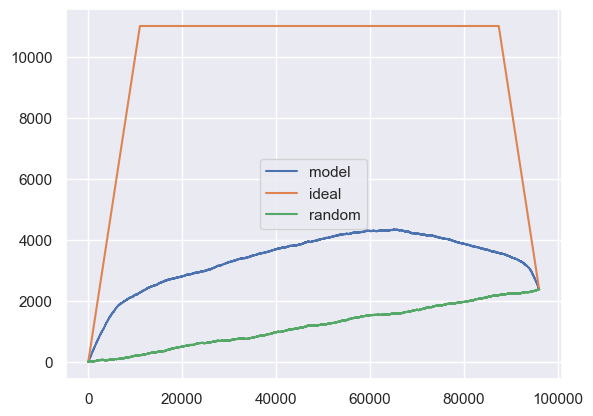

In [128]:
k_model_, score_model_ = qini_curve(val['conversion'].values, val_uplift, val['is_treatment'].values)
k_ideal, score_ideal = perfect_qini_curve(val['conversion'].values, val['is_treatment'].values)
k_random, score_random = qini_curve(val['conversion'].values, np.random.random(len(val['conversion'])), val['is_treatment'].values)

plt.plot(k_model_, score_model_, label='model');
plt.plot(k_ideal, score_ideal, label='ideal');
plt.plot(k_random, score_random, label='random');
plt.legend()
plt.show();




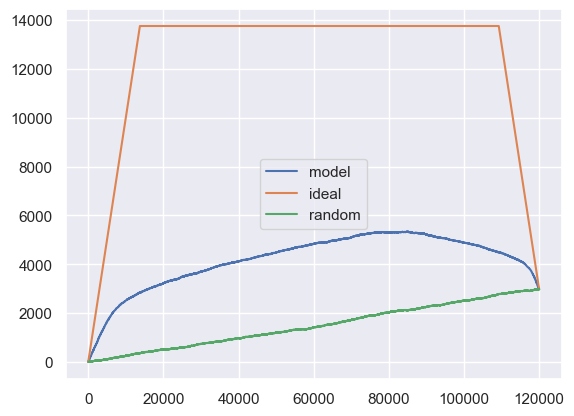

In [129]:
k_model_, score_model_ = qini_curve(test['conversion'].values, test_uplift, test['is_treatment'].values)
k_ideal, score_ideal = perfect_qini_curve(test['conversion'].values, test['is_treatment'].values)
k_random, score_random = qini_curve(test['conversion'].values, np.random.random(len(test['conversion'])), test['is_treatment'].values)

plt.plot(k_model_, score_model_, label='model');
plt.plot(k_ideal, score_ideal, label='ideal');
plt.plot(k_random, score_random, label='random');
plt.legend()
plt.show();

In [116]:
info = pd.DataFrame(zip(train.drop('conversion', axis=1).columns, tlearner.feature_importances_), columns=['feature', 'importance'])
info.sort_values(by='importance', ascending=False)

,feature,importance
50,is_treatment,12.155283
15,X_16,8.318035
32,X_33,5.669632
40,X_41,5.651808
2,X_3,5.202253
18,X_19,5.070870
3,X_4,4.637673
34,X_35,3.771908
37,X_38,3.513653
39,X_40,3.436507


In [141]:
print('Qini [train]:', qini_auc_score(train.loc[:, 'conversion'].values, train_uplift, train.loc[:, 'is_treatment'].values))
print('Qini [val]:', qini_auc_score(val.loc[:, 'conversion'].values, val_uplift, val.loc[:, 'is_treatment'].values))
print('Qini [test]:', qini_auc_score(test.loc[:, 'conversion'].values, test_uplift, test['is_treatment'].values));


Qini [train]: 0.2568721095574769
Qini [val]: 0.24797159485522496
Qini [test]: 0.243662013344479


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)
/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)
/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 

#### Model 2: T-learner

In [155]:
st_learner = cb.CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=False
)

ct_learner = cb.CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=False
)

In [156]:
treat_train = train[train['is_treatment']==1]
contr_train = train[train['is_treatment']==0]

st_learner.fit(
    treat_train.drop(['conversion', 'is_treatment'], axis=1), 
    treat_train['conversion']
)

ct_learner.fit(
    contr_train.drop(['conversion', 'is_treatment'], axis=1), 
    contr_train['conversion']
)


In [158]:
train_preds_treat = st_learner.predict_proba(treat_train.drop(['conversion', 'is_treatment'], axis=1))[:, 1]
train_preds_contr = ct_learner.predict_proba(contr_train.drop(['conversion', 'is_treatment'], axis=1))[:, 1]

print('roc-auc [train + treat]:', roc_auc_score(treat_train['conversion'], train_preds_treat))
print('roc-auc [train + contr]:', roc_auc_score(contr_train['conversion'], train_preds_contr))

roc-auc [train + treat]: 0.8327806016957098
roc-auc [train + contr]: 0.8053074991071267


In [163]:
treat_val = val[val['is_treatment']==1]
contr_val = val[val['is_treatment']==0]

val_preds_treat = st_learner.predict_proba(treat_val.drop(['conversion', 'is_treatment'], axis=1))[:, 1]
val_preds_contr = ct_learner.predict_proba(contr_val.drop(['conversion', 'is_treatment'], axis=1))[:, 1]

print('roc-auc [val + treat]:', roc_auc_score(treat_val['conversion'], val_preds_treat))
print('roc-auc [val + contr]:', roc_auc_score(contr_val['conversion'], val_preds_contr))

roc-auc [val + treat]: 0.7957480636170153
roc-auc [val + contr]: 0.7379373634271372


In [162]:
treat_test = test[test['is_treatment']==1]
contr_test = test[test['is_treatment']==0]

test_preds_treat = st_learner.predict_proba(treat_test.drop(['conversion', 'is_treatment'], axis=1))[:, 1]
test_preds_contr = ct_learner.predict_proba(contr_test.drop(['conversion', 'is_treatment'], axis=1))[:, 1]

print('roc-auc [test + treat]:', roc_auc_score(treat_test['conversion'], test_preds_treat))
print('roc-auc [test + contr]:', roc_auc_score(contr_test['conversion'], test_preds_contr))

roc-auc [test + treat]: 0.7964890165231573
roc-auc [test + contr]: 0.736561841160746


In [164]:
def calculate_t_uplift(st_learner, ct_learner, data):
    feats = data.drop(['conversion', 'is_treatment'], axis=1) 
    st_learner = st_learner.predict_proba(feats)[:, 1]
    ct_learner = ct_learner.predict_proba(feats)[:, 1]
    return st_learner - ct_learner

train_uplift = calculate_t_uplift(st_learner, ct_learner, train)
val_uplift = calculate_t_uplift(st_learner, ct_learner, val)
test_uplift = calculate_t_uplift(st_learner, ct_learner, test)


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


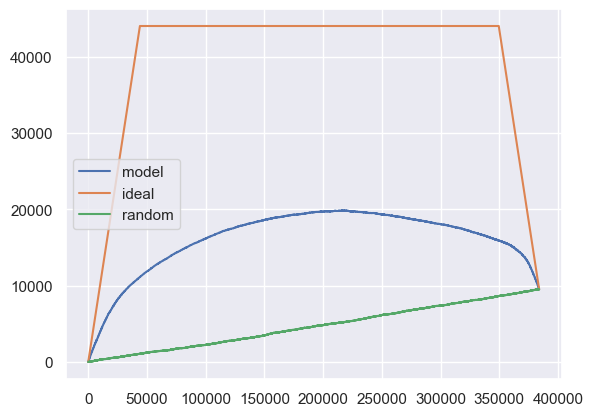

In [165]:
k_model_, score_model_ = qini_curve(train['conversion'].values, train_uplift, train['is_treatment'].values)
k_ideal, score_ideal = perfect_qini_curve(train['conversion'].values, train['is_treatment'].values)
k_random, score_random = qini_curve(train['conversion'].values, np.random.random(len(train['conversion'])), train['is_treatment'].values)

plt.plot(k_model_, score_model_, label='model');
plt.plot(k_ideal, score_ideal, label='ideal');
plt.plot(k_random, score_random, label='random');
plt.legend()
plt.show();


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


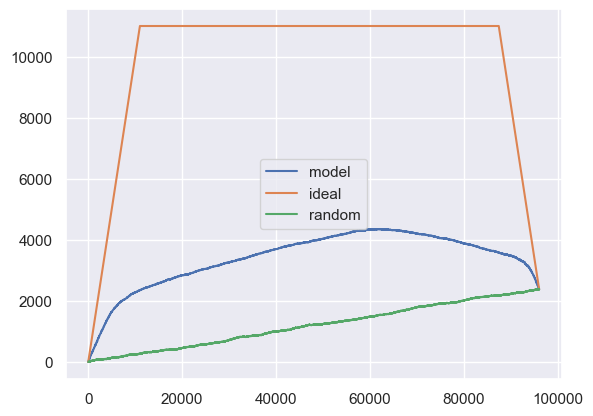

In [166]:
k_model_, score_model_ = qini_curve(val['conversion'].values, val_uplift, val['is_treatment'].values)
k_ideal, score_ideal = perfect_qini_curve(val['conversion'].values, val['is_treatment'].values)
k_random, score_random = qini_curve(val['conversion'].values, np.random.random(len(val['conversion'])), val['is_treatment'].values)

plt.plot(k_model_, score_model_, label='model');
plt.plot(k_ideal, score_ideal, label='ideal');
plt.plot(k_random, score_random, label='random');
plt.legend()
plt.show();


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


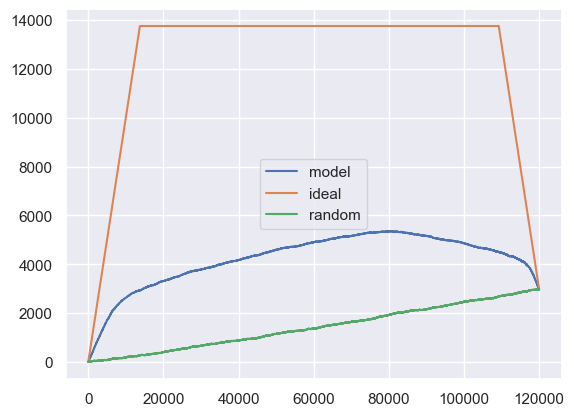

In [167]:
k_model_, score_model_ = qini_curve(test['conversion'].values, test_uplift, test['is_treatment'].values)
k_ideal, score_ideal = perfect_qini_curve(test['conversion'].values, test['is_treatment'].values)
k_random, score_random = qini_curve(test['conversion'].values, np.random.random(len(test['conversion'])), test['is_treatment'].values)

plt.plot(k_model_, score_model_, label='model');
plt.plot(k_ideal, score_ideal, label='ideal');
plt.plot(k_random, score_random, label='random');
plt.legend()
plt.show();


In [168]:
print('Qini [train]:', qini_auc_score(train.loc[:, 'conversion'].values, train_uplift, train.loc[:, 'is_treatment'].values))
print('Qini [val]:', qini_auc_score(val.loc[:, 'conversion'].values, val_uplift, val.loc[:, 'is_treatment'].values))
print('Qini [test]:', qini_auc_score(test.loc[:, 'conversion'].values, test_uplift, test['is_treatment'].values));


Qini [train]: 0.32106895377975586
Qini [val]: 0.25032800886585616
Qini [test]: 0.2476746142233555


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)
/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


#### Model 3: TarNET

In [178]:
import torch
from torch import nn, optim

from torch.utils.data import TensorDataset, DataLoader

In [226]:
train_dataset = TensorDataset(
    torch.tensor(train.drop(['conversion', 'is_treatment'], axis=1).values),
    torch.tensor(train['is_treatment'].values),
    torch.tensor(train['conversion'].values)
)

val_dataset = TensorDataset(
    torch.tensor(val.drop(['conversion', 'is_treatment'], axis=1).values),
    torch.tensor(val['is_treatment'].values),
    torch.tensor(val['conversion'].values)
)

test_dataset = TensorDataset(
    torch.tensor(test.drop(['conversion', 'is_treatment'], axis=1).values),
    torch.tensor(test['is_treatment'].values),
    torch.tensor(test['conversion'].values)
)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)

In [227]:
class TarNet(nn.Module): 
    def __init__(self, input_dim, hidden_dim, features_dim):
        super(TarNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, features_dim)
        
        self.extractor = nn.Sequential(
            self.fc1,
            nn.ReLU(),
            self.fc2,
            nn.ReLU(),
            self.fc3
        )

        self.treat_predictor = nn.Sequential(
            nn.Linear(features_dim, 2)
        )
        self.contr_predictor = nn.Sequential(
            nn.Linear(features_dim, 2)
        )

    def forward(self, x):
        x = self.extractor(x)
        treat_pred = self.treat_predictor(x)
        contr_pred = self.contr_predictor(x)
        return treat_pred, contr_pred



In [230]:
tarnet = TarNet(train.drop(['conversion', 'is_treatment'], axis=1).shape[1], 32, 32)
N_EPOCHS = 100 
loss_f = nn.CrossEntropyLoss()
optimizer = optim.Adam(tarnet.parameters(), lr=0.001)

for epoch in range(N_EPOCHS): 
    tarnet.train()
    epoch_loss = 0 
    for x, t, y in train_loader: 
        treat_preds, contr_preds = tarnet(x.float())

        treat_preds = treat_preds[torch.nonzero(t).view(-1), :]
        contr_preds = contr_preds[torch.nonzero(1-t).view(-1), :]
        
        loss = loss_f(treat_preds, y[torch.nonzero(t).view(-1)]) + loss_f(contr_preds, y[torch.nonzero(1-t).view(-1)])
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{N_EPOCHS}, Loss [TRAIN]: {epoch_loss/len(train_loader)}")

    val_loss = 0
    tarnet.eval()
    for x, t, y in val_loader: 
        treat_preds, contr_preds = tarnet(x.float())
        treat_preds = treat_preds[torch.nonzero(t).view(-1), :]
        contr_preds = contr_preds[torch.nonzero(1-t).view(-1), :]
        # print(treat_preds.shape, contr_preds.shape)

        loss = loss_f(treat_preds, y[torch.nonzero(t).view(-1)]) + loss_f(contr_preds, y[torch.nonzero(1-t).view(-1)])
        val_loss += loss.item()

    # Добавим расчет Qini коэффициента на валидационной выборке после эпохи
    val_preds_uplift = []
    val_target = [] 
    val_treatment = [] 
    
    tarnet.eval()
    for x_val, t_val, y_val in val_loader:
        treat_preds, contr_preds = tarnet(x_val.float())
        # uplift — разница score для treatment и control
        batch_uplift = treat_preds[:, 1] - contr_preds[:, 1]
        val_preds_uplift.append(batch_uplift.detach().cpu().numpy())
        val_target.append(y_val.detach().cpu().numpy())
        val_treatment.append(t_val.detach().cpu().numpy())

    val_preds_uplift = np.concatenate(val_preds_uplift)
    val_target = np.concatenate(val_target)
    val_treatment = np.concatenate(val_treatment)

    # Для расчета нужно знать истинные ответы и флаг treatment
    qini = qini_auc_score(val_target, val_preds_uplift, val_treatment)
    print(f"Qini [VAL]: {qini}")

    print(f"Epoch {epoch+1}/{N_EPOCHS}, Loss [VAL]: {val_loss/len(val_loader)}")


Epoch 1/100, Loss [TRAIN]: 0.8682893577516079


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.22125544714938525
Epoch 1/100, Loss [VAL]: 0.7853146619002024
Epoch 2/100, Loss [TRAIN]: 0.7705062151451906


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2425189729681893
Epoch 2/100, Loss [VAL]: 0.7553288190762202
Epoch 3/100, Loss [TRAIN]: 0.746096536030372


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25514471408857875
Epoch 3/100, Loss [VAL]: 0.736541551788648
Epoch 4/100, Loss [TRAIN]: 0.7298225954671701


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.259767890411321
Epoch 4/100, Loss [VAL]: 0.7282514893213908
Epoch 5/100, Loss [TRAIN]: 0.7202200497587522


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2604733787120031
Epoch 5/100, Loss [VAL]: 0.7181911073923111
Epoch 6/100, Loss [TRAIN]: 0.714272025436163


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2633058311486191
Epoch 6/100, Loss [VAL]: 0.7145265827178955
Epoch 7/100, Loss [TRAIN]: 0.710511404166619


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2621385395846462
Epoch 7/100, Loss [VAL]: 0.7125745740334193
Epoch 8/100, Loss [TRAIN]: 0.7076666043202082


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.26458372343530845
Epoch 8/100, Loss [VAL]: 0.7076950067281723
Epoch 9/100, Loss [TRAIN]: 0.7056664674083392


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2635664536897503
Epoch 9/100, Loss [VAL]: 0.706114226937294
Epoch 10/100, Loss [TRAIN]: 0.7047582574387391


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2627156170832673
Epoch 10/100, Loss [VAL]: 0.7109011480410894
Epoch 11/100, Loss [TRAIN]: 0.7031877438227335


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2608912695668319
Epoch 11/100, Loss [VAL]: 0.7084016931454341
Epoch 12/100, Loss [TRAIN]: 0.7024896684686343


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.26269886482573385
Epoch 12/100, Loss [VAL]: 0.7039135055541992
Epoch 13/100, Loss [TRAIN]: 0.7006991486648718


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.26177616223257666
Epoch 13/100, Loss [VAL]: 0.703752963423729
Epoch 14/100, Loss [TRAIN]: 0.7010811196565628


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2639041093903135
Epoch 14/100, Loss [VAL]: 0.7021197437445322
Epoch 15/100, Loss [TRAIN]: 0.7001298959950606


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2640589415994035
Epoch 15/100, Loss [VAL]: 0.7034439442157745
Epoch 16/100, Loss [TRAIN]: 0.6992873999973138


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.26690463161234
Epoch 16/100, Loss [VAL]: 0.702369853814443
Epoch 17/100, Loss [TRAIN]: 0.6993057851195336


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2593533036702805
Epoch 17/100, Loss [VAL]: 0.7030794664621353
Epoch 18/100, Loss [TRAIN]: 0.6984434194664161


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2629026433133551
Epoch 18/100, Loss [VAL]: 0.7027458291451136
Epoch 19/100, Loss [TRAIN]: 0.6978785861333211


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.26400478445372144
Epoch 19/100, Loss [VAL]: 0.7021940546433131
Epoch 20/100, Loss [TRAIN]: 0.697556984424591


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2556846973039358
Epoch 20/100, Loss [VAL]: 0.7024291497866313
Epoch 21/100, Loss [TRAIN]: 0.6971381457448006


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2642935235115454
Epoch 21/100, Loss [VAL]: 0.7058986445267995
Epoch 22/100, Loss [TRAIN]: 0.6968126510679722


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.26394613188847676
Epoch 22/100, Loss [VAL]: 0.7037516065438588
Epoch 23/100, Loss [TRAIN]: 0.6963231433431307


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2603633418114045
Epoch 23/100, Loss [VAL]: 0.7001885868310929
Epoch 24/100, Loss [TRAIN]: 0.6963191035985946


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2611576940088373
Epoch 24/100, Loss [VAL]: 0.6986470197836558
Epoch 25/100, Loss [TRAIN]: 0.6953721649050713


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2580373760037824
Epoch 25/100, Loss [VAL]: 0.7003001797596614
Epoch 26/100, Loss [TRAIN]: 0.696068606565396


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.26150820688843623
Epoch 26/100, Loss [VAL]: 0.701680157105128
Epoch 27/100, Loss [TRAIN]: 0.6954685709774494


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.26094210889434266
Epoch 27/100, Loss [VAL]: 0.7010485505660375
Epoch 28/100, Loss [TRAIN]: 0.6948007477422555


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2576348132799099
Epoch 28/100, Loss [VAL]: 0.7017621521949768
Epoch 29/100, Loss [TRAIN]: 0.6953334083954493


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25404847411352355
Epoch 29/100, Loss [VAL]: 0.7012720633347829
Epoch 30/100, Loss [TRAIN]: 0.6947036192516486


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25806993155304153
Epoch 30/100, Loss [VAL]: 0.6998233977953593
Epoch 31/100, Loss [TRAIN]: 0.6945372648537159


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25660548455785415
Epoch 31/100, Loss [VAL]: 0.6994342344999314
Epoch 32/100, Loss [TRAIN]: 0.6941713861823082


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2557003017687782
Epoch 32/100, Loss [VAL]: 0.7003065328200658
Epoch 33/100, Loss [TRAIN]: 0.6939979599118232


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25859217313274485
Epoch 33/100, Loss [VAL]: 0.7015071767171224
Epoch 34/100, Loss [TRAIN]: 0.6934828973114491


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2486427320895396
Epoch 34/100, Loss [VAL]: 0.700808007756869
Epoch 35/100, Loss [TRAIN]: 0.6939469282329083


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2527819707531403
Epoch 35/100, Loss [VAL]: 0.6984711362520853
Epoch 36/100, Loss [TRAIN]: 0.6930789530575275


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25361252262447104
Epoch 36/100, Loss [VAL]: 0.7037346895535787
Epoch 37/100, Loss [TRAIN]: 0.692902201294899


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24751704848826123
Epoch 37/100, Loss [VAL]: 0.7004552801847458
Epoch 38/100, Loss [TRAIN]: 0.6930634863475958


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24779821485176787
Epoch 38/100, Loss [VAL]: 0.7008567926486333
Epoch 39/100, Loss [TRAIN]: 0.6928471040626367


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24370310671536635
Epoch 39/100, Loss [VAL]: 0.6999310201803843
Epoch 40/100, Loss [TRAIN]: 0.6924107549587886


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24384085084861926
Epoch 40/100, Loss [VAL]: 0.7006919928789139
Epoch 41/100, Loss [TRAIN]: 0.6923392144441605


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24248556024421342
Epoch 41/100, Loss [VAL]: 0.7004614681005478
Epoch 42/100, Loss [TRAIN]: 0.6922227071126302


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24633087874676274
Epoch 42/100, Loss [VAL]: 0.7008761575222016
Epoch 43/100, Loss [TRAIN]: 0.6920437179605166


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25259206605193985
Epoch 43/100, Loss [VAL]: 0.7003307218949
Epoch 44/100, Loss [TRAIN]: 0.6922023518681526


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24485060609970338
Epoch 44/100, Loss [VAL]: 0.7000005828936895
Epoch 45/100, Loss [TRAIN]: 0.6917177397310734


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24512298355656503
Epoch 45/100, Loss [VAL]: 0.7011605457464853
Epoch 46/100, Loss [TRAIN]: 0.6916575776040554


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24839067515864804
Epoch 46/100, Loss [VAL]: 0.7030549490451813
Epoch 47/100, Loss [TRAIN]: 0.6911086751321952


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2572039134495464
Epoch 47/100, Loss [VAL]: 0.6994441501696904
Epoch 48/100, Loss [TRAIN]: 0.6914784328540167


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2555532232084132
Epoch 48/100, Loss [VAL]: 0.700129975438118
Epoch 49/100, Loss [TRAIN]: 0.6910626392761866


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.23838878741411573
Epoch 49/100, Loss [VAL]: 0.7045345114866892
Epoch 50/100, Loss [TRAIN]: 0.691166005919377


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24837855024956162
Epoch 50/100, Loss [VAL]: 0.7021754050254821
Epoch 51/100, Loss [TRAIN]: 0.6905976893305779


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24668745924026023
Epoch 51/100, Loss [VAL]: 0.7008249611854553
Epoch 52/100, Loss [TRAIN]: 0.6908638830482959


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24372345423446048
Epoch 52/100, Loss [VAL]: 0.6977553389469783
Epoch 53/100, Loss [TRAIN]: 0.6909726866781711


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.23770232721870613
Epoch 53/100, Loss [VAL]: 0.700169412612915
Epoch 54/100, Loss [TRAIN]: 0.6907896958788236


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2403257977709186
Epoch 54/100, Loss [VAL]: 0.7009902938604354
Epoch 55/100, Loss [TRAIN]: 0.6905986243188381


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2466115927593644
Epoch 55/100, Loss [VAL]: 0.7025385498603185
Epoch 56/100, Loss [TRAIN]: 0.6907728977402051


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24620146374892696
Epoch 56/100, Loss [VAL]: 0.6997320915857951
Epoch 57/100, Loss [TRAIN]: 0.6906154820521673


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2520906003320573
Epoch 57/100, Loss [VAL]: 0.7012061295906703
Epoch 58/100, Loss [TRAIN]: 0.6899323205351829


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25738919066719435
Epoch 58/100, Loss [VAL]: 0.6995747677087784
Epoch 59/100, Loss [TRAIN]: 0.6904943969945113


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.23980740007996187
Epoch 59/100, Loss [VAL]: 0.6995489715735118
Epoch 60/100, Loss [TRAIN]: 0.6902899075349171


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2517155017586729
Epoch 60/100, Loss [VAL]: 0.7011622523069382
Epoch 61/100, Loss [TRAIN]: 0.6901661461095016


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2580667146347371
Epoch 61/100, Loss [VAL]: 0.7002154919703801
Epoch 62/100, Loss [TRAIN]: 0.6901590287089348


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2488030104686168
Epoch 62/100, Loss [VAL]: 0.7000250844160716
Epoch 63/100, Loss [TRAIN]: 0.689988309542338


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24641333137015117
Epoch 63/100, Loss [VAL]: 0.7000301327705384
Epoch 64/100, Loss [TRAIN]: 0.6891887602011363


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24514269559767735
Epoch 64/100, Loss [VAL]: 0.7004818584521612
Epoch 65/100, Loss [TRAIN]: 0.6895138255357742


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24277430372842607
Epoch 65/100, Loss [VAL]: 0.7002498472134272
Epoch 66/100, Loss [TRAIN]: 0.689446538557609


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2522122862140528
Epoch 66/100, Loss [VAL]: 0.7015909464756648
Epoch 67/100, Loss [TRAIN]: 0.6889575392107169


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2514230726619451
Epoch 67/100, Loss [VAL]: 0.7021788228750229
Epoch 68/100, Loss [TRAIN]: 0.6894279715021451


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24075175637063786
Epoch 68/100, Loss [VAL]: 0.7001595138311386
Epoch 69/100, Loss [TRAIN]: 0.6892030660708746


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24397688462229497
Epoch 69/100, Loss [VAL]: 0.7024510201215745
Epoch 70/100, Loss [TRAIN]: 0.6892394453684489


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25293062725422344
Epoch 70/100, Loss [VAL]: 0.6991344969272614
Epoch 71/100, Loss [TRAIN]: 0.6885788646042347


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25232158313190894
Epoch 71/100, Loss [VAL]: 0.7005840752124787
Epoch 72/100, Loss [TRAIN]: 0.688708916892608


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24652749261105802
Epoch 72/100, Loss [VAL]: 0.6989439254204433
Epoch 73/100, Loss [TRAIN]: 0.6887496612866719


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24579983238479183
Epoch 73/100, Loss [VAL]: 0.7018074238697688
Epoch 74/100, Loss [TRAIN]: 0.6889902990659078


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24349361711303788
Epoch 74/100, Loss [VAL]: 0.699657280921936
Epoch 75/100, Loss [TRAIN]: 0.68856505270799


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25254219088279134
Epoch 75/100, Loss [VAL]: 0.7037303552627564
Epoch 76/100, Loss [TRAIN]: 0.6887024057507515


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.23503751817778337
Epoch 76/100, Loss [VAL]: 0.7002853190104167
Epoch 77/100, Loss [TRAIN]: 0.6888316436111928


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2439817450621254
Epoch 77/100, Loss [VAL]: 0.7009721779425939
Epoch 78/100, Loss [TRAIN]: 0.6883089591264725


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2531184116758729
Epoch 78/100, Loss [VAL]: 0.700265037894249
Epoch 79/100, Loss [TRAIN]: 0.6881546342571576


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24362864646896953
Epoch 79/100, Loss [VAL]: 0.7021604140202204
Epoch 80/100, Loss [TRAIN]: 0.6885014921526114


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24872544690658394
Epoch 80/100, Loss [VAL]: 0.7004978621403376
Epoch 81/100, Loss [TRAIN]: 0.688615316102902


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24144901895842824
Epoch 81/100, Loss [VAL]: 0.7012311591307322
Epoch 82/100, Loss [TRAIN]: 0.6882353899379571


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24444570248280545
Epoch 82/100, Loss [VAL]: 0.7009374242226283
Epoch 83/100, Loss [TRAIN]: 0.6884358881016572


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2514206025495311
Epoch 83/100, Loss [VAL]: 0.7015350897312165
Epoch 84/100, Loss [TRAIN]: 0.6879314212103684


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2426956289385677
Epoch 84/100, Loss [VAL]: 0.7002511295080185
Epoch 85/100, Loss [TRAIN]: 0.6886890849967797


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24063515923696271
Epoch 85/100, Loss [VAL]: 0.701231323281924
Epoch 86/100, Loss [TRAIN]: 0.6880746608277162


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24320380353657198
Epoch 86/100, Loss [VAL]: 0.7025584834814071
Epoch 87/100, Loss [TRAIN]: 0.6879331708649794


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2339165678975952
Epoch 87/100, Loss [VAL]: 0.6999853602250417
Epoch 88/100, Loss [TRAIN]: 0.6876261851886908


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.23312996109032288
Epoch 88/100, Loss [VAL]: 0.6998487187226613
Epoch 89/100, Loss [TRAIN]: 0.6878168666064739


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24144608559524444
Epoch 89/100, Loss [VAL]: 0.7007708463271459
Epoch 90/100, Loss [TRAIN]: 0.6878661825160185


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.23300879919823175
Epoch 90/100, Loss [VAL]: 0.7036471050182979
Epoch 91/100, Loss [TRAIN]: 0.6879842536449432


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.23610866230160987
Epoch 91/100, Loss [VAL]: 0.7020880801280339
Epoch 92/100, Loss [TRAIN]: 0.6874346693853537


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24195764651785948
Epoch 92/100, Loss [VAL]: 0.7001102039019267
Epoch 93/100, Loss [TRAIN]: 0.6875554961462815


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.23843304954775005
Epoch 93/100, Loss [VAL]: 0.7009812436898549
Epoch 94/100, Loss [TRAIN]: 0.6871996383666992


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.25430070086510376
Epoch 94/100, Loss [VAL]: 0.7025003033479055
Epoch 95/100, Loss [TRAIN]: 0.6877583686212698


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.23746645082606424
Epoch 95/100, Loss [VAL]: 0.7011201652288437
Epoch 96/100, Loss [TRAIN]: 0.6875027219653129


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2381497819218566
Epoch 96/100, Loss [VAL]: 0.7033581379652023
Epoch 97/100, Loss [TRAIN]: 0.6875943884352843


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.24285804491768295
Epoch 97/100, Loss [VAL]: 0.6998757771253585
Epoch 98/100, Loss [TRAIN]: 0.6875035564005375


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.23895861289326337
Epoch 98/100, Loss [VAL]: 0.7008508548339208
Epoch 99/100, Loss [TRAIN]: 0.6870741576552392


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


Qini [VAL]: 0.2341464743637651
Epoch 99/100, Loss [VAL]: 0.7021259109179179
Epoch 100/100, Loss [TRAIN]: 0.6875332596103351
Qini [VAL]: 0.2396191428322064
Epoch 100/100, Loss [VAL]: 0.7030110096931458


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


In [212]:
val_uplift = []
test_uplift = [] 
train_uplift = []

for x, t, y in val_loader:
    treat_preds, contr_preds = tarnet(x.float())
    batch_uplift = treat_preds[:, 1] - contr_preds[:, 1]
    val_uplift.append(batch_uplift.view(-1).detach().cpu().numpy())
    
for x, t, y in test_loader:
    treat_preds, contr_preds = tarnet(x.float())
    batch_uplift = treat_preds[:, 1] - contr_preds[:, 1]
    test_uplift.append(batch_uplift.view(-1).detach().cpu().numpy())

for x, t, y in train_loader: 
    treat_preds, contr_preds = tarnet(x.float())
    batch_uplift = treat_preds[:, 1] - contr_preds[:, 1]
    train_uplift.append(batch_uplift.view(-1).detach().cpu().numpy())

train_uplift = np.concatenate(train_uplift)
val_uplift = np.concatenate(val_uplift)
test_uplift = np.concatenate(test_uplift)



In [213]:
print('Qini [train]:', qini_auc_score(train.loc[:, 'conversion'].values, train_uplift, train.loc[:, 'is_treatment'].values))
print('Qini [val]:', qini_auc_score(val.loc[:, 'conversion'].values, val_uplift, val.loc[:, 'is_treatment'].values))
print('Qini [test]:', qini_auc_score(test.loc[:, 'conversion'].values, test_uplift, test['is_treatment'].values));


Qini [train]: -0.0006646002453404428
Qini [val]: 0.2621781182374239
Qini [test]: 0.2577627162725295


/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)
/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)
/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 

/Users/skanich/projects/mlops_uplift_modeling/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function stable_cumsum is deprecated; `sklearn.utils.extmath.stable_cumsum` is deprecated in version 1.8 and will be removed in 1.10. Use `np.cumulative_sum` with the desired dtype directly instead.
  warnings.warn(msg, category=FutureWarning)


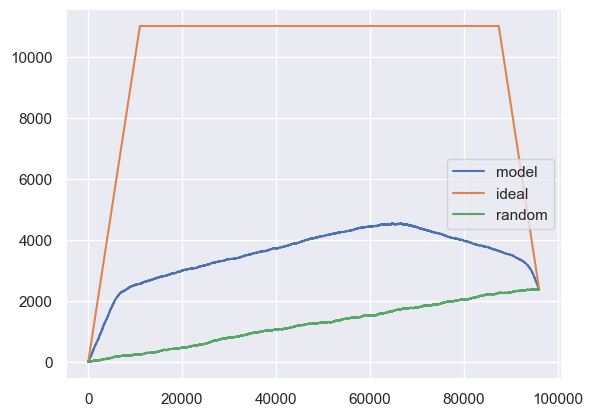

In [216]:
k_model_, score_model_ = qini_curve(val['conversion'].values, val_uplift, val['is_treatment'].values)
k_ideal, score_ideal = perfect_qini_curve(val['conversion'].values, val['is_treatment'].values)
k_random, score_random = qini_curve(val['conversion'].values, np.random.random(len(val['conversion'])), val['is_treatment'].values)

plt.plot(k_model_, score_model_, label='model');
plt.plot(k_ideal, score_ideal, label='ideal');
plt.plot(k_random, score_random, label='random');
plt.legend()
plt.show();


In [ ]:
for x, t, y in train_loader:
    treat_preds, contr_preds = tarnet(x.float())
    batch_uplift = treat_preds[:, 1] - contr_preds[:, 1]
    train_uplift.append(batch_uplift.view(-1).detach().cpu().numpy())

train_uplift = np.concatenate(train_uplift)


In [ ]:
tarnet()

ValueError: only one element tensors can be converted to Python scalars

In [223]:
next(iter(train_loader))

[tensor([[ 0.4824, -0.5560, -0.2918,  ...,  0.0736, -1.0108, -0.4464],
         [-0.8646,  0.9466, -1.3529,  ..., -0.2150,  0.8108,  1.8783],
         [-1.0564, -0.5848, -0.7354,  ..., -0.5944, -0.1471, -0.0382],
         ...,
         [-0.4366,  1.3908,  0.8846,  ..., -0.9588, -0.7755,  1.6611],
         [-0.3755,  0.5398,  0.1185,  ...,  0.0669,  1.6249,  0.9163],
         [-1.0762,  1.6103, -0.1179,  ...,  0.1915, -1.1434,  0.5018]],
        dtype=torch.float64),
 tensor([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
         0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
         0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
         0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
         0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
         1, 1, 0, 0, 0, 1, 1, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        

In [2]:
import pandas as pd

In [4]:
tr=pd.read_csv('../data/processed/train.csv')

In [7]:
vl=pd.read_csv('../data/processed/val.csv')

In [8]:
vl

,id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,conversion,is_treatment
0,492858,-16.412723,-0.779238,-13.687399,125.813873,-42.557563,-199.741322,-64.382376,-47.210764,-6.530921,...,95.937948,0.894914,-5.845045,-0.575136,-464.067165,-116.441899,257.300539,-2.079193,0,1
1,46848,-15.571341,-0.167212,29.322301,50.987212,-78.663056,-382.802994,-104.023887,250.562574,21.753326,...,327.643590,0.818472,-36.772518,-1.424147,213.227410,-14.666983,198.531589,41.218523,1,1
2,368462,-90.295953,-0.322410,9.354699,-36.891390,0.378328,104.973250,27.398387,-78.113242,15.074275,...,-53.872670,1.257336,49.826788,-0.931090,361.851192,-35.605820,-15.891040,-22.093625,1,1
3,599091,-29.119686,-0.566607,-22.735992,-26.585254,44.715460,-15.616553,20.972677,-2.108019,11.723576,...,-670.452066,-0.420848,-3.974406,0.176109,-1247.725758,98.110753,-320.831337,-16.378479,0,1
4,423432,21.170003,1.059862,-15.050574,34.375461,-97.467881,187.794018,-34.685673,-67.657464,41.345482,...,108.130434,-0.097096,-12.899765,-0.206130,-271.706957,49.997874,-75.264016,-34.504592,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95995,244473,-7.014641,0.035718,11.784647,-55.152074,30.594433,47.780244,2.006976,92.306017,26.750248,...,-274.448214,1.854141,-48.457534,1.073085,272.128230,125.845966,54.889574,-7.701542,1,0
95996,127015,34.277252,-0.734281,-32.302756,-9.939795,-22.635940,-34.768726,-33.094301,-17.917820,77.439117,...,615.796816,1.118428,-11.776115,1.529038,1324.187906,66.044051,104.667804,-5.583735,0,0
95997,524125,-12.498116,-1.379818,-1.584139,-23.752012,-80.981287,26.868289,-84.538806,-53.076065,-64.744271,...,-326.840038,-0.311645,61.698159,-0.901811,-79.942472,327.771039,-46.301852,-11.548363,0,0
95998,87995,12.007668,1.569641,2.633371,-41.273492,35.678133,-43.207383,-51.420787,-19.842329,34.521013,...,273.849185,-0.217586,16.391516,-0.978285,-17.728757,-72.267449,135.905345,-24.240962,0,0
